In [1]:

import torch
import torch.nn as nn
import numpy as np

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image, ImageOps


import glob
import PIL

from sklearn.model_selection import train_test_split


In [2]:

## !pip install scikit-learn
## !pip install numpy
## !pip install pandas
## !pip install matplotlib


## GPU

In [3]:
if torch.cuda.is_available():
  torch.set_default_tensor_type(torch.cuda.FloatTensor)
  print("using cuda:", torch.cuda.get_device_name(0))
  pass

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

using cuda: GeForce RTX 2080 Ti


device(type='cuda')

In [4]:

civs_path = 'data/imgs.new.CIVS'


In [5]:

path  = civs_path

paths = glob.glob(path + "/*.jpg") # Grabbing all the image file names

n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images , replace=False) 
all_paths   = paths_subset[rand_idxs]

print(n_images)


5016


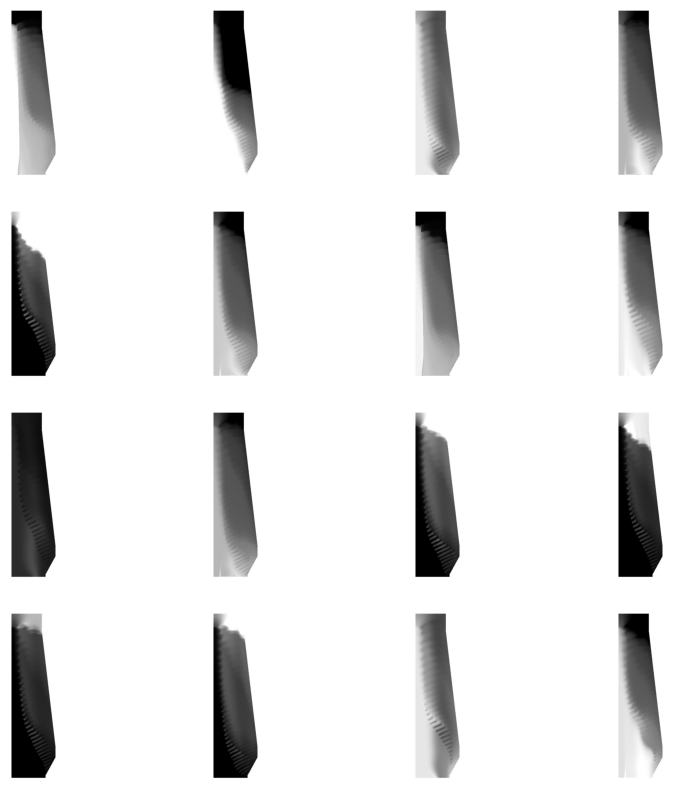

In [6]:

_, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")


In [7]:
## data/imgs.new.CIVS/h2_Ng90_Pci0_H0_Wp0_Ph300_Ox27_Ow3.0_Hbt1410_Wm12.2_Wr308750.4.jpg
## data/imgs.new.CIVS/h2o_Ng0_Pci150_H0_Wp0_Ph300_Ox24_Ow6_Hbt1459.8_Wm12.2_Wr308750.4.jpg
## data/imgs.new.CIVS/h2_Ng40_Pci60_H0_Wp0_Ph300_Ox23_Ow5_Hbt1459.8_Wm12.2_Wr308750.4.jpg

    
## ['tg', 'Ng0', 'Pci175', 'H0', 'Wp0', 'Ph300', 'Ox24', 'Ow7', 'Hbt1459.8', 'Wm12.2', 'Wr308750.4']
    

In [8]:

'''

['tg',  'Ng120', 'Pci0', 'H0', 'Wp0', 'Ph300', 'Ox30', 'Ow3.0', 'Hbt1485', 'Wm12.2', 'Wr308750.4']
['h2o', 'Ng70', 'Pci0', 'H0', 'Wp0', 'Ph500', 'Ox24', 'Ow5.0', 'Hbt1459.8', 'Wm12.2', 'Wr308750.4']
['co2', 'Ng50', 'Pci200', 'H0', 'Wp0', 'Ph300', 'Ox30', 'Ow4', 'Hbt1459.8', 'Wm12.2', 'Wr308750.4']


'''



"\n\n['tg',  'Ng120', 'Pci0', 'H0', 'Wp0', 'Ph300', 'Ox30', 'Ow3.0', 'Hbt1485', 'Wm12.2', 'Wr308750.4']\n['h2o', 'Ng70', 'Pci0', 'H0', 'Wp0', 'Ph500', 'Ox24', 'Ow5.0', 'Hbt1459.8', 'Wm12.2', 'Wr308750.4']\n['co2', 'Ng50', 'Pci200', 'H0', 'Wp0', 'Ph300', 'Ox30', 'Ow4', 'Hbt1459.8', 'Wm12.2', 'Wr308750.4']\n\n\n"

In [9]:



def label_func2(fname):
    ## print(fname)
    fname = fname.replace("data/imgs.new.CIVS/","")
    temp_name = fname.replace(".jpg", "").split("_")
    ## print(temp_name)
    
  
    y0 = temp_name[0]                              ## tg
    y1 = float(temp_name[1].replace("Ng", ""))     ## 'Ng0'
    y2 = float(temp_name[2].replace("Pci", ""))    ## 'Pci175'
    y3 = float(temp_name[3].replace("H", ""))     ## 'H0'
    y4 = float(temp_name[4].replace("Wp", ""))     ## 'Wp0'
    y5 = float(temp_name[5].replace("Ph", ""))     ## 'Ph300'
    y6 = float(temp_name[6].replace("Ox", ""))    ## 'Ox24'
    y7 = float(temp_name[7].replace("Ow", ""))     ## 'Ow7
    y8 = float(temp_name[8].replace("Hbt", ""))    ## 'Hbt1459.8'
    y9 = float(temp_name[9].replace("Wm", ""))    ## 'Wm12.2'
    y10 = float(temp_name[10].replace("Wr", ""))    ## 'Wr308750.4'
    
 
    ## np.array([y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10 ])
    return [y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10 ]



In [10]:

## 1400, 390
## x 0.2
## 280 , 78
## 140,  39


list_imgs = []
list_label_vectors = []

for img_name in all_paths:
    ##print(img_name)
    
    my_img = Image.open(img_name)
    
    my_img = my_img.resize((39, 140))
    ## my_img = ImageOps.grayscale(my_img)
 

    img_np = np.array(my_img)

    ## img_np = img_np.reshape(-1)
    
    temp_label_vector_rc = label_func2(img_name)
    if temp_label_vector_rc[0] == "tg":
    
        ## print(img_np.shape)
        list_imgs.append(img_np)
    
        ## conditions_labels_regression = label_func2(img_name)
        ## list_label_vectors.append( 0 ) 
        list_label_vectors.append( temp_label_vector_rc )


In [11]:

## X = np.array( list_imgs)
## y = np.array( list_label_vectors )
## print(X.shape)
## print(y.shape)

X =  list_imgs
y =  list_label_vectors 



In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#######################################################

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


585
251
585
251


In [13]:
X_train[7].shape

(140, 39, 3)



## Dataset class


In [14]:

class MnistDataset(Dataset):
    
   
    def __init__(self):
     
        self.labels          = []
        self.tensor_imgs     = []
        self.one_hot_classes = []
        self.img_size_1d     = 21840
        self.n_samples       = 0
        self.noise_size      = 1000
        

    def plot_image(self, index):
        img = self.tensor_imgs[index]   ##.reshape(280, 78)
        print(img.shape)
        label = str( self.labels[index] )
        ## img = img.astype(float)
      
        return img, label
    
    


In [15]:

mnist_dataset = MnistDataset()


In [16]:


mnist_dataset.n_samples = len( X_train )

mnist_dataset.n_samples




585

In [17]:

for index in range(mnist_dataset.n_samples):
    
    # image target (label)
    reg_vals = y_train[index]
    target = torch.zeros( (10) )
    
    target[ 0 ] = reg_vals[1]
    target[ 1 ] = reg_vals[2]
    target[ 2 ] = reg_vals[3]
    target[ 3 ] = reg_vals[4]
    target[ 4 ] = reg_vals[5]
    target[ 5 ] = reg_vals[6]
    target[ 6 ] = reg_vals[7]
    target[ 7 ] = reg_vals[8]
    target[ 8 ] = reg_vals[9]
    target[ 9 ] = reg_vals[10]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_train[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    image_values = torch.cuda.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,140,39) / 255.0
        
    mnist_dataset.labels.append(          reg_vals            )
    mnist_dataset.tensor_imgs.append(      image_values       )
    mnist_dataset.one_hot_classes.append(  target             )





In [18]:

print( len( mnist_dataset.labels           ))
print( len( mnist_dataset.tensor_imgs      ))
print( len( mnist_dataset.one_hot_classes  ))


585
585
585


In [19]:

img, the_reg_values = mnist_dataset.plot_image(45)


torch.Size([1, 3, 140, 39])


In [20]:
the_reg_values

"['tg', 150.0, 0.0, 0.0, 0.0, 400.0, 30.0, 3.0, 1459.8, 12.2, 308750.4]"

torch.Size([3, 140, 39])
torch.Size([140, 39, 3])


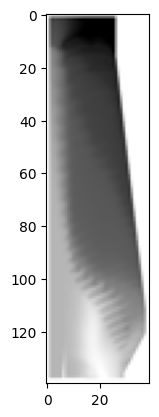

In [21]:

reshaped_img = img.squeeze(0)
print(  reshaped_img.shape  )

reshaped_img = reshaped_img.permute(1, 2, 0).cpu()  ###.view(1,3,280,78)

print(  reshaped_img.shape  )

plt.imshow(reshaped_img)
plt.show()




## Function to generate uniform random data


In [22]:

def generate_random(size):
    random_data = torch.rand(size)
    return random_data

def generate_random_image(size):
    random_data = torch.rand(size)
    return random_data


def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data



# size here must only be an integer
def generate_random_one_hot(size):
    label_tensor = torch.rand((size))
    return label_tensor



## Resize view class

In [23]:


class View(nn.Module):
    def __init__(self, shape):
        super().__init__()
        self.shape = shape,

    def forward(self, x):
        return x.view(*self.shape)
    




## Crop


In [24]:

# crop (numpy array) image to given width and height

def crop_centre(img, new_width, new_height):
    height, width, _ = img.shape
    startx = width//2 - new_width//2
    starty = height//2 - new_height//2    
    return img[  starty:starty + new_height, startx:startx + new_width, :]




## Discriminator


In [25]:

class Discriminator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
     
        self.model = nn.Sequential(
            ## nn.Linear(mnist_dataset.img_size_1d+11, 2000)
            # expect input of shape (1,3,140,39)
            nn.Conv2d(3, 256, kernel_size=4, stride=2),
            nn.BatchNorm2d(256),
            #nn.LeakyReLU(0.2),
            nn.GELU(),
            
            nn.Conv2d(256, 256, kernel_size=4, stride=2),
            nn.BatchNorm2d(256),
            #nn.LeakyReLU(0.2),
            nn.GELU(),
            
            nn.Conv2d(256, 3, kernel_size=4, stride=2),
            #nn.LeakyReLU(0.2),
            nn.GELU(),
            
            View(135),
            nn.Linear(135, 1),
            nn.Sigmoid()
        )
    
        # create loss function
        self.loss_function = nn.BCELoss()

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)
        

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []
        
      

    def forward_conditional(self, image_tensor, label_tensor):
        # combine seed and label
        inputs = torch.cat( (image_tensor, label_tensor) )
        return self.model(inputs)   

        
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)

        
    def train_conditional(self, inputs, label_tensor, targets):
        # calculate the output of the network
        outputs = self.forward(inputs, label_tensor)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
        
        if (self.counter % 100 == 0):
            print("counter = ", self.counter)
         

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 100 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
   
 
       



## Test that the discriminator can separate real data from random noise


In [26]:

print( mnist_dataset )


In [27]:

%%time

D = Discriminator()
D.to(device)

for i in range(mnist_dataset.n_samples):
    label             = mnist_dataset.labels[i]
    image_data_tensor = mnist_dataset.tensor_imgs[i]
    target_tensor     = mnist_dataset.one_hot_classes[i]
 

    ## D.train_conditional(image_data_tensor, target_tensor, torch.FloatTensor([1.0]))
    D.train(image_data_tensor, torch.cuda.FloatTensor([1.0]))
    # fake data
    '''   
    D.train(
           generate_random_image(mnist_dataset.img_size_1d), 
           generate_random_one_hot(11), 
           torch.FloatTensor([0.0])
    )
    
    '''
    D.train(
           generate_random_image((1,3,140,39)), 
           torch.cuda.FloatTensor([0.0])
    )
 




counter =  100
counter =  200
counter =  300
counter =  400
counter =  500
counter =  600
counter =  700
counter =  800
counter =  900
counter =  1000
counter =  1100
CPU times: user 3.62 s, sys: 430 ms, total: 4.05 s
Wall time: 4.61 s


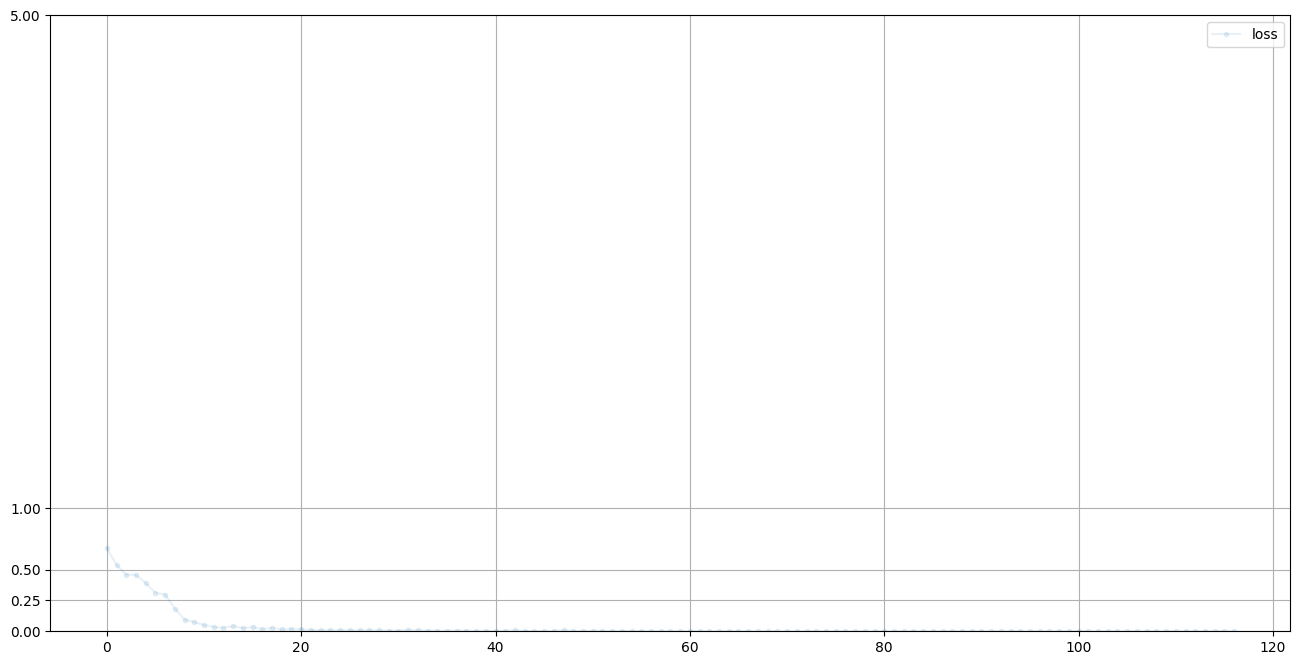

In [28]:

D.plot_progress()



## Manually run discriminator to check it can tell real data from fake


In [29]:

for i in range(4):
    index = random.randint(0,mnist_dataset.n_samples) 
    image_data_tensor = mnist_dataset.tensor_imgs [     index   ]
    target_tensor     = mnist_dataset.one_hot_classes[  index   ]

    ## print( D.forward( image_data_tensor, target_tensor ).item() )
    print( D.forward( image_data_tensor ).item() )


for i in range(4):
    ## print( D.forward( generate_random_image(mnist_dataset.img_size_1d), generate_random_one_hot(11) ).item() )
    print( D.forward( generate_random_image((1,3,140,39)) ).item() )





0.9998801946640015
0.9998875856399536
0.9998729228973389
0.9998639822006226
0.0004979904042556882
0.00043131684651598334
0.001065314281731844
0.0005586502957157791



## Generator Network


In [30]:

class Generator(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        self.model = nn.Sequential(
            ## nn.Linear(mnist_dataset.noise_size+11, 2000)
            # input is a 1d array
            nn.Linear(100, 300),
            #nn.LeakyReLU(0.2),
            nn.GELU(),
            
           
            # reshape to 4d
            View((1, 3, 10, 10)),
            
   
            nn.ConvTranspose2d(3, 128, kernel_size=8, stride=2),
            nn.BatchNorm2d(128),
            #nn.LeakyReLU(0.2),
            nn.GELU(),
            
            
            ## nn.ConvTranspose2d(128,128, kernel_size=8, stride=2),
            ## nn.BatchNorm2d(128),
            #nn.LeakyReLU(0.2),
            ## nn.GELU(),

            nn.ConvTranspose2d(128, 3, kernel_size=8, stride=2, padding=1),
            nn.BatchNorm2d(3),
            
            
            View(9408),
            nn.Linear(9408, 16380),

            # output should be (1,3,128,128) ## (1, 3, 280, 78)
            
            nn.Sigmoid(),
            View(  (1, 3, 140, 39)  )
        )
        
 
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)

        # counter and accumulator for progress
        self.counter  = 0;
        self.progress = []
        

        
    def forward_conditional(self, seed_tensor, label_tensor):        
        # combine seed and label
        inputs = torch.cat( (seed_tensor, label_tensor) )
        return self.model(inputs)

        
    
    def forward(self, inputs):        
        # simply run model
        return self.model(inputs)
    
    
    def train_conditional(self, D, inputs, label_tensor, targets):
        # calculate the output of the network
        g_output = self.forward(inputs, label_tensor)
        
        # pass onto Discriminator
        d_output = D.forward(g_output, label_tensor)
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
         

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        
        
    def train(self, D, inputs, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)
        
        # pass onto Discriminator
        d_output = D.forward(g_output)
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

  
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
        

    
        
    def plot_images(self, label):
        label_tensor = torch.zeros((10))
        label_tensor[label] = 1.0
        # plot a 3 column, 2 row array of sample images
        f, axarr = plt.subplots(2,3, figsize=(16,8))
        for i in range(2):
            for j in range(3):
                axarr[i,j].imshow(
                            G.forward(
                            generate_random_seed(100), 
                            label_tensor
                            ).detach().cpu().numpy().reshape(28,28), interpolation='none', cmap='Blues'
                )
        

        

        


## Check the generator output is of the right type and shape


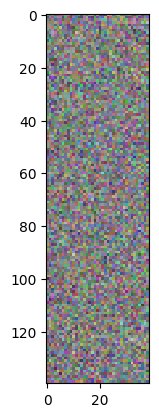

In [31]:

G = Generator()


## output = G.forward(generate_random_seed(mnist_dataset.noise_size), generate_random_one_hot(11))
output = G.forward(generate_random_seed(100))


img = output.detach().permute(0,2,3,1).view(140,39,3).cpu().numpy()


plt.imshow(img, interpolation='none', cmap='Blues')





## Train GAN

create Discriminator and Generator

train Discriminator and Generator


In [37]:

D = Discriminator()
G = Generator()

D.to(device)
G.to(device)
     


Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=300, bias=True)
    (1): GELU(approximate='none')
    (2): View()
    (3): ConvTranspose2d(3, 128, kernel_size=(8, 8), stride=(2, 2))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): GELU(approximate='none')
    (6): ConvTranspose2d(128, 3, kernel_size=(8, 8), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): View()
    (9): Linear(in_features=9408, out_features=16380, bias=True)
    (10): Sigmoid()
    (11): View()
  )
)

In [38]:


epochs = 20

for epoch in range(epochs):
    print(epoch)
    print("epoch = ", epoch + 1)

    for i in range(mnist_dataset.n_samples):
        
    
        label             = mnist_dataset.labels[i]
        image_data_tensor = mnist_dataset.tensor_imgs[i]
        target_tensor     = mnist_dataset.one_hot_classes[i]
    
        
        # train discriminator on true
        ## D.train(image_data_tensor, target_tensor, torch.FloatTensor([1.0]) )
    
        D.train(image_data_tensor, torch.cuda.FloatTensor([1.0]))
    
        # random 1-hot label for generator
        ## random_label = generate_random_one_hot(1)
    
        # train discriminator on false
        # use detach() so gradients in G are not calculated

        '''
        D.train( G.forward(  
                           generate_random_seed(mnist_dataset.noise_size), 
                           random_label
                      ).detach(),                 # use detach() so gradients in G are not calculated
             random_label, 
             torch.FloatTensor( [0.0] )
           )
        '''
    
        D.train(G.forward(generate_random_seed(100)).detach(), torch.cuda.FloatTensor([0.0]))
    
        ## random_label = generate_random_one_hot(11)
    
        ## G.train(D, generate_random_seed(mnist_dataset.noise_size), random_label, torch.FloatTensor([1.0]))
        G.train(D, generate_random_seed(100), torch.cuda.FloatTensor([1.0]))
    
      
    
  


0
epoch =  1
counter =  100
counter =  200
counter =  300
counter =  400
counter =  500
counter =  600
counter =  700
counter =  800
counter =  900
counter =  1000
counter =  1100
1
epoch =  2
counter =  1200
counter =  1300
counter =  1400
counter =  1500
counter =  1600
counter =  1700
counter =  1800
counter =  1900
counter =  2000
counter =  2100
counter =  2200
counter =  2300
2
epoch =  3
counter =  2400
counter =  2500
counter =  2600
counter =  2700
counter =  2800
counter =  2900
counter =  3000
counter =  3100
counter =  3200
counter =  3300
counter =  3400
counter =  3500
3
epoch =  4
counter =  3600
counter =  3700
counter =  3800
counter =  3900
counter =  4000
counter =  4100
counter =  4200
counter =  4300
counter =  4400
counter =  4500
counter =  4600
4
epoch =  5
counter =  4700
counter =  4800
counter =  4900
counter =  5000
counter =  5100
counter =  5200
counter =  5300
counter =  5400
counter =  5500
counter =  5600
counter =  5700
counter =  5800
5
epoch =  6
cou


## Plot discriminator error

for the discriminator, we want the loss values to be around 0.25 for a balanced discriminator and generator, there the discriminator is not confident at telling real images from generated images. if the loss values fall towards zero, it suggests the generator has not learned to fool the discriminator.


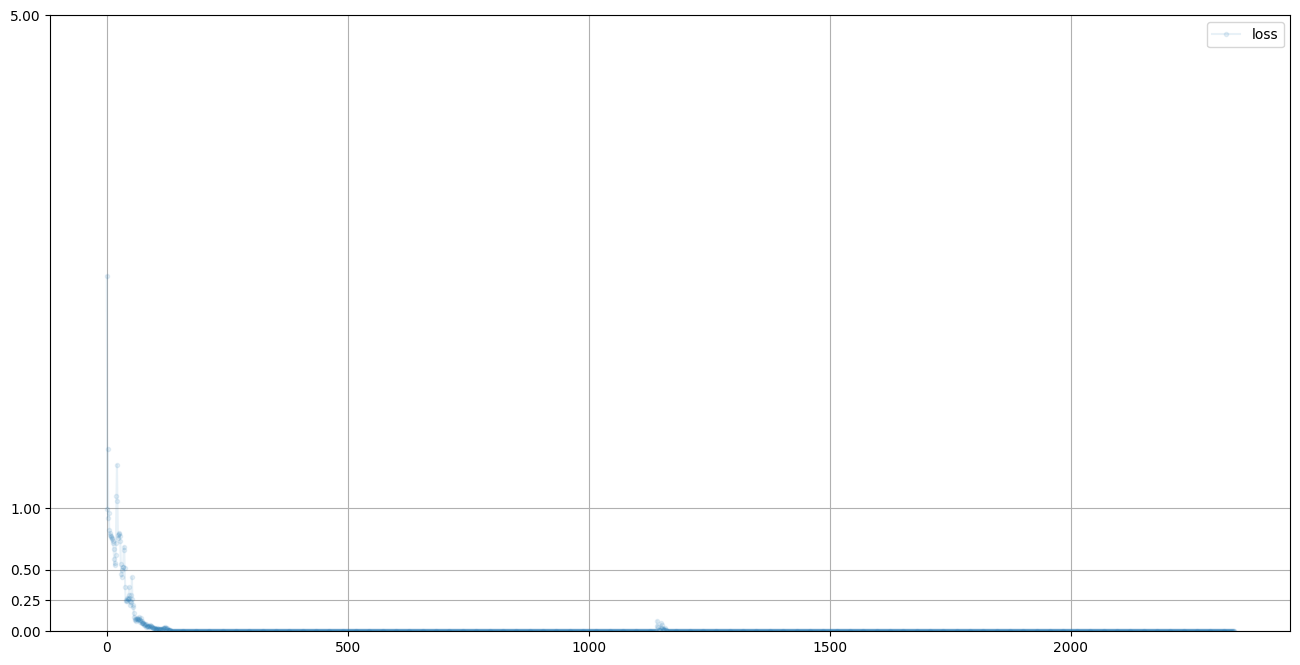

In [39]:

D.plot_progress()



## Plot generator error


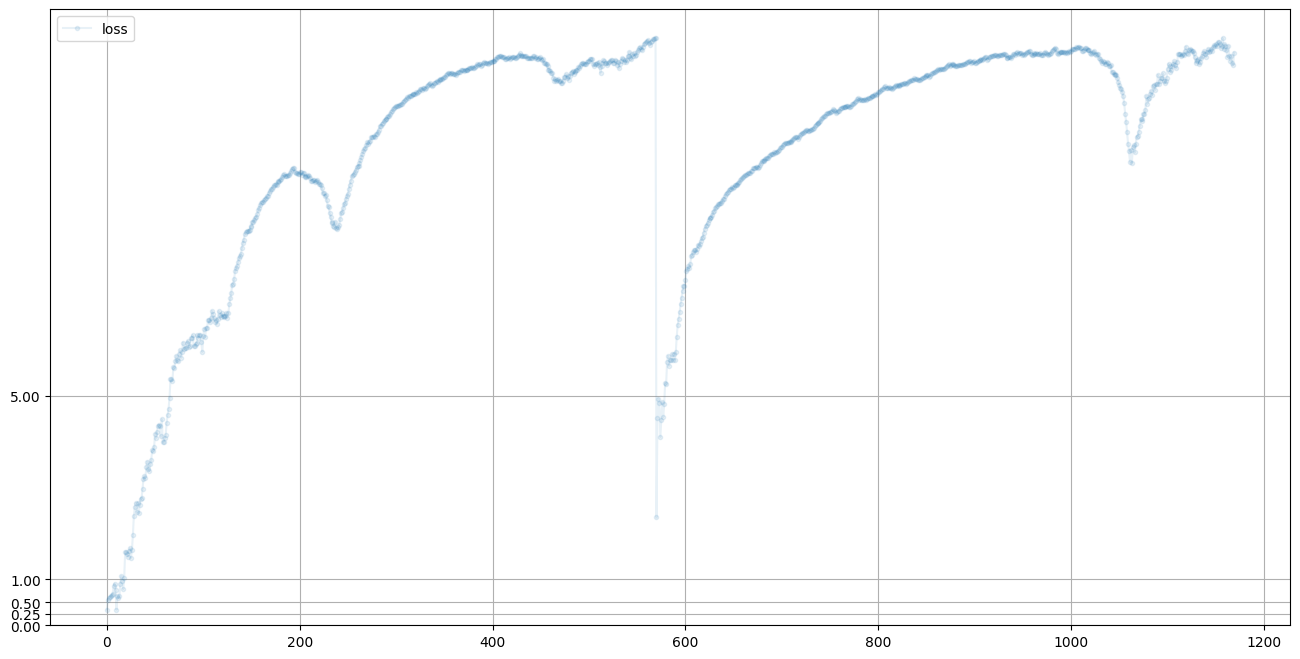

In [40]:

G.plot_progress()


## Random trained generation

* plot a 3 column, 2 row array of generated images



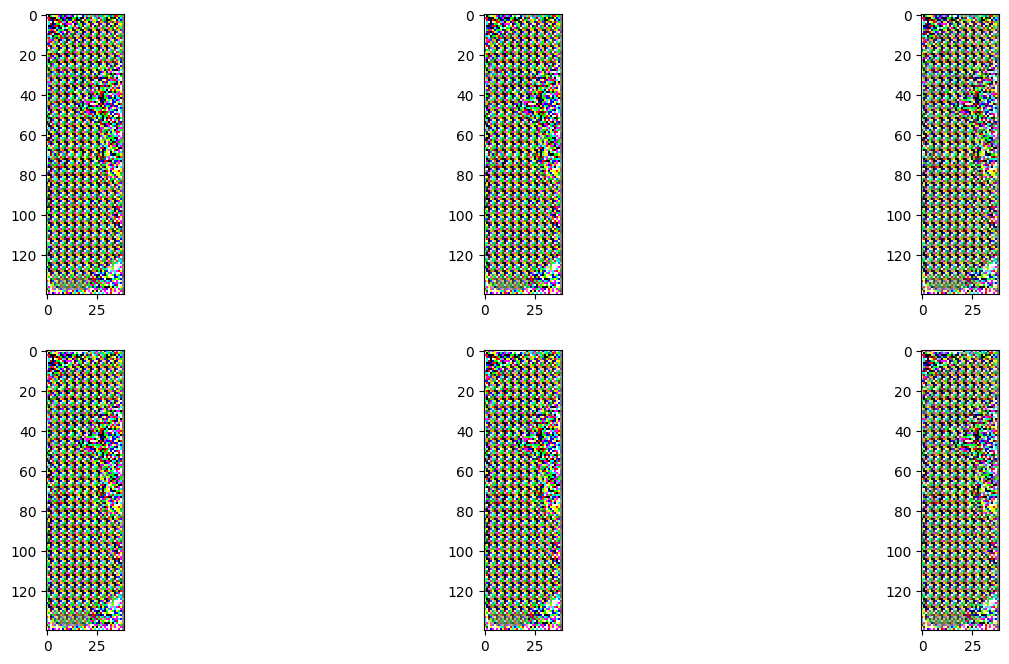

In [41]:



f, axarr = plt.subplots(2,3, figsize=(16,8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.detach().permute(0,2,3,1).view(140,39,3).cpu().numpy()
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
 




## Run Generator after training

plot several outputs from the trained generator

plot a 3 column, 2 row array of generated images


In [ ]:

## data/imgs.new.CIVS/h2_Ng90_Pci0_H0_Wp0_Ph300_Ox27_Ow3.0_Hbt1410_Wm12.2_Wr308750.4.jpg
## data/imgs.new.CIVS/h2o_Ng0_Pci150_H0_Wp0_Ph300_Ox24_Ow6_Hbt1459.8_Wm12.2_Wr308750.4.jpg
## data/imgs.new.CIVS/h2_Ng40_Pci60_H0_Wp0_Ph300_Ox23_Ow5_Hbt1459.8_Wm12.2_Wr308750.4.jpg




In [ ]:



target = torch.zeros( (11) )

    
target[ 0 ] = 0.0
target[ 1 ] = 37.9
target[ 2 ] = 0.0
target[ 3 ] = 0.0
target[ 4 ] = 0.0
target[ 5 ] = 400.0
target[ 6 ] = 24.0
target[ 7 ] = 5.0
target[ 8 ] = 1459.8
target[ 9 ] = 12.2
target[ 10 ] = 308750.4
        

        
f, axarr = plt.subplots(2,3, figsize=(16,8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(mnist_dataset.noise_size), target)
        img = output.detach().numpy().reshape(280,78)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')

      

